# A summary of concepts in Infomap implementation:

##### Levels:
The hierarchical approach of Infomap enables you to see the network's structure at different levels of detail. Level 1 is the finest-grained partition, where individual nodes or small clusters are considered as communities. As you move to higher levels, the algorithm aggregates smaller communities into larger ones, revealing more general groupings in the data. Each level provides a different perspective on the community structure and highlights different organizational patterns.

##### Top Modules:
At the highest level of the hierarchy, the top modules are the most inclusive clusters of nodes. These clusters can represent overarching themes, categories, or functional groups in the network. The division of the network into top modules provides a macroscopic view of the network's organization.

##### Codelength:
Infomap optimizes the codelength by minimizing the description length of the network's structure and community assignments. In essence, the codelength measures how well the algorithm has captured the relationships between nodes by grouping them into communities. Lower codelength indicates that the discovered community structure efficiently represents the network's structure in terms of modular organization. A lower codelength indicates a more efficient representation of the network. The goal of Infomap is to find a community structure that minimizes the codelength.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import os



In [2]:
filepath = '/Users/melikakeshavarz/Desktop/INFO/kato_et_al_1990.xls'
sheets = ['matr','pla+pol','pla','pol']
sheet = sheets[0]
dataframe = pd.read_excel(filepath, sheet_name = sheet, header = [0,1,2])
dataframe

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [3]:
plant_genus   = dataframe.columns.get_level_values(0)[2::]
plant_species = dataframe.columns.get_level_values(1)[2::]
plant_numbers = dataframe.columns.get_level_values(0)[3::]
plant_species

Index(['rufinerve', 'himalaicum', 'turbinata', 'pilosa', 'acerifolia',
       'platanifolium', 'brevipedunculata', 'flaccida', 'polymorpha',
       'pubescens', 'filiforme', 'aemula', 'dioicus', 'glehni', 'thunbergii',
       'japonica', 'kousa', 'tenuicaulis', 'delphiniifolia', 'alternifolia',
       'divaricatum', 'crenata', 'japonicum', 'kagamontanum', 'micranthum',
       'communis', 'lineariloba', 'pallida', 'japonica', 'podocarpum',
       'crenata', 'sessile', 'grandiflorum', 'alatus', 'sieboldianus',
       'nepalense', 'japonicum', 'tomentella', 'hirta', 'macrophylla',
       'paniculata', 'noli-tangere', 'textori', 'dentata', 'yomena', 'bicolor',
       'obtusifolium', 'clethroides', 'salicifolia', 'griffithii', 'villosa',
       'aestiva', 'pubescens', 'senticosa', 'thunbergii', 'japonicus',
       'amurense', 'asiatica', 'macranthum', 'Grayana', 'incisa', 'salicina',
       'longituba', 'trichocarpa', 'japonica', 'javanica', 'trichocarpa',
       'multiflora', 'illecebrosus

# creating a connection matrix:

df0 is the connection matrix with names being the indeces.

In [4]:
df = dataframe.copy(deep=True)
df

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [5]:
df.columns = ['pollenators', 'no.']+list(plant_species)
poll_num = df['no.'] 
df0=df.drop(columns='no.')

poll_species = df0['pollenators']
df0=df0.set_index('pollenators')
df0


rufinerve  himalaicum  \
pollenators                                                           
ACHILIDAE1 (Ach. : Hem. )                             0           0   
Acteniceromorphus nipponensis (Ela. : Col. )          0           0   
Actina jezoensis (Str. : Dip. )                       0           0   
Adelphocoris triannulatus (Mir. : Hem. )              0           0   
AGALLIIDAE1 (Aga. : Hem. )                            0           0   
...                                                 ...         ...   
LUSIIDAE1 (Clu. : Dip. )                              0           0   
Lasioglossum (El.) aff (Hal. : Hym )                  0           0   
Camponotus sp. (For. : Hym. )                         0           0   
Andrena sp. (And. : Hym. )                            0           0   
Ceratina sp. (Ant. : Hym.)                            0           0   

                                              turbinata  pilosa  acerifolia  \
pollenators                                                                   
ACHILIDAE1 (Ach. : Hem. )                             0       0           0   
Acteniceromorphus nipponensis (Ela. : Col. )          0       0           0   
Actina jezoensis (Str. : Dip. )                       0       0           0   
Adelphocoris triannulatus (Mir. : Hem. )              0       0           0   
AGALLIIDAE1 (Aga. : Hem. )                            0       0           0   
...                                                 ...     ...         ...   
LUSIIDAE1 (Clu. : Dip. )                              0       0           0   
Lasioglossum (El.) aff (Hal. : Hym )                  0       0           0   
Camponotus sp. (For. : Hym. )                         0       0           0   
Andrena sp. (And. : Hym. )                            0       0           0   
Ceratina sp. (Ant. : Hym.)                            0       0           0   

                                              platanifolium  brevipedunculata  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                                 0                 0   
Acteniceromorphus nipponensis (Ela. : Col. )              0                 0   
Actina jezoensis (Str. : Dip. )                           0                 0   
Adelphocoris triannulatus (Mir. : Hem. )                  0                 0   
AGALLIIDAE1 (Aga. : Hem. )                                0                 0   
...                                                     ...               ...   
LUSIIDAE1 (Clu. : Dip. )                                  0                 0   
Lasioglossum (El.) aff (Hal. : Hym )                      0                 0   
Camponotus sp. (For. : Hym. )                             0                 0   
Andrena sp. (And. : Hym. )                                0                 0   
Ceratina sp. (Ant. : Hym.)                                0                 0   

                                              flaccida  polymorpha  pubescens  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                            0           0          0   
Acteniceromorphus nipponensis (Ela. : Col. )         0           0          0   
Actina jezoensis (Str. : Dip. )                      0           0          0   
Adelphocoris triannulatus (Mir. : Hem. )             0           0          0   
AGALLIIDAE1 (Aga. : Hem. )                           0           0          0   
...                                                ...         ...        ...   
LUSIIDAE1 (Clu. : Dip. )                             0           0          0   
Lasioglossum (El.) aff (Hal. : Hym )                 0           0          0   
Camponotus sp. (For. : Hym. )                        0           0          0   
Andrena sp. (And. : Hym. )                           0           0          0   
Ceratina sp. (Ant. : Hym.)                           0           0  

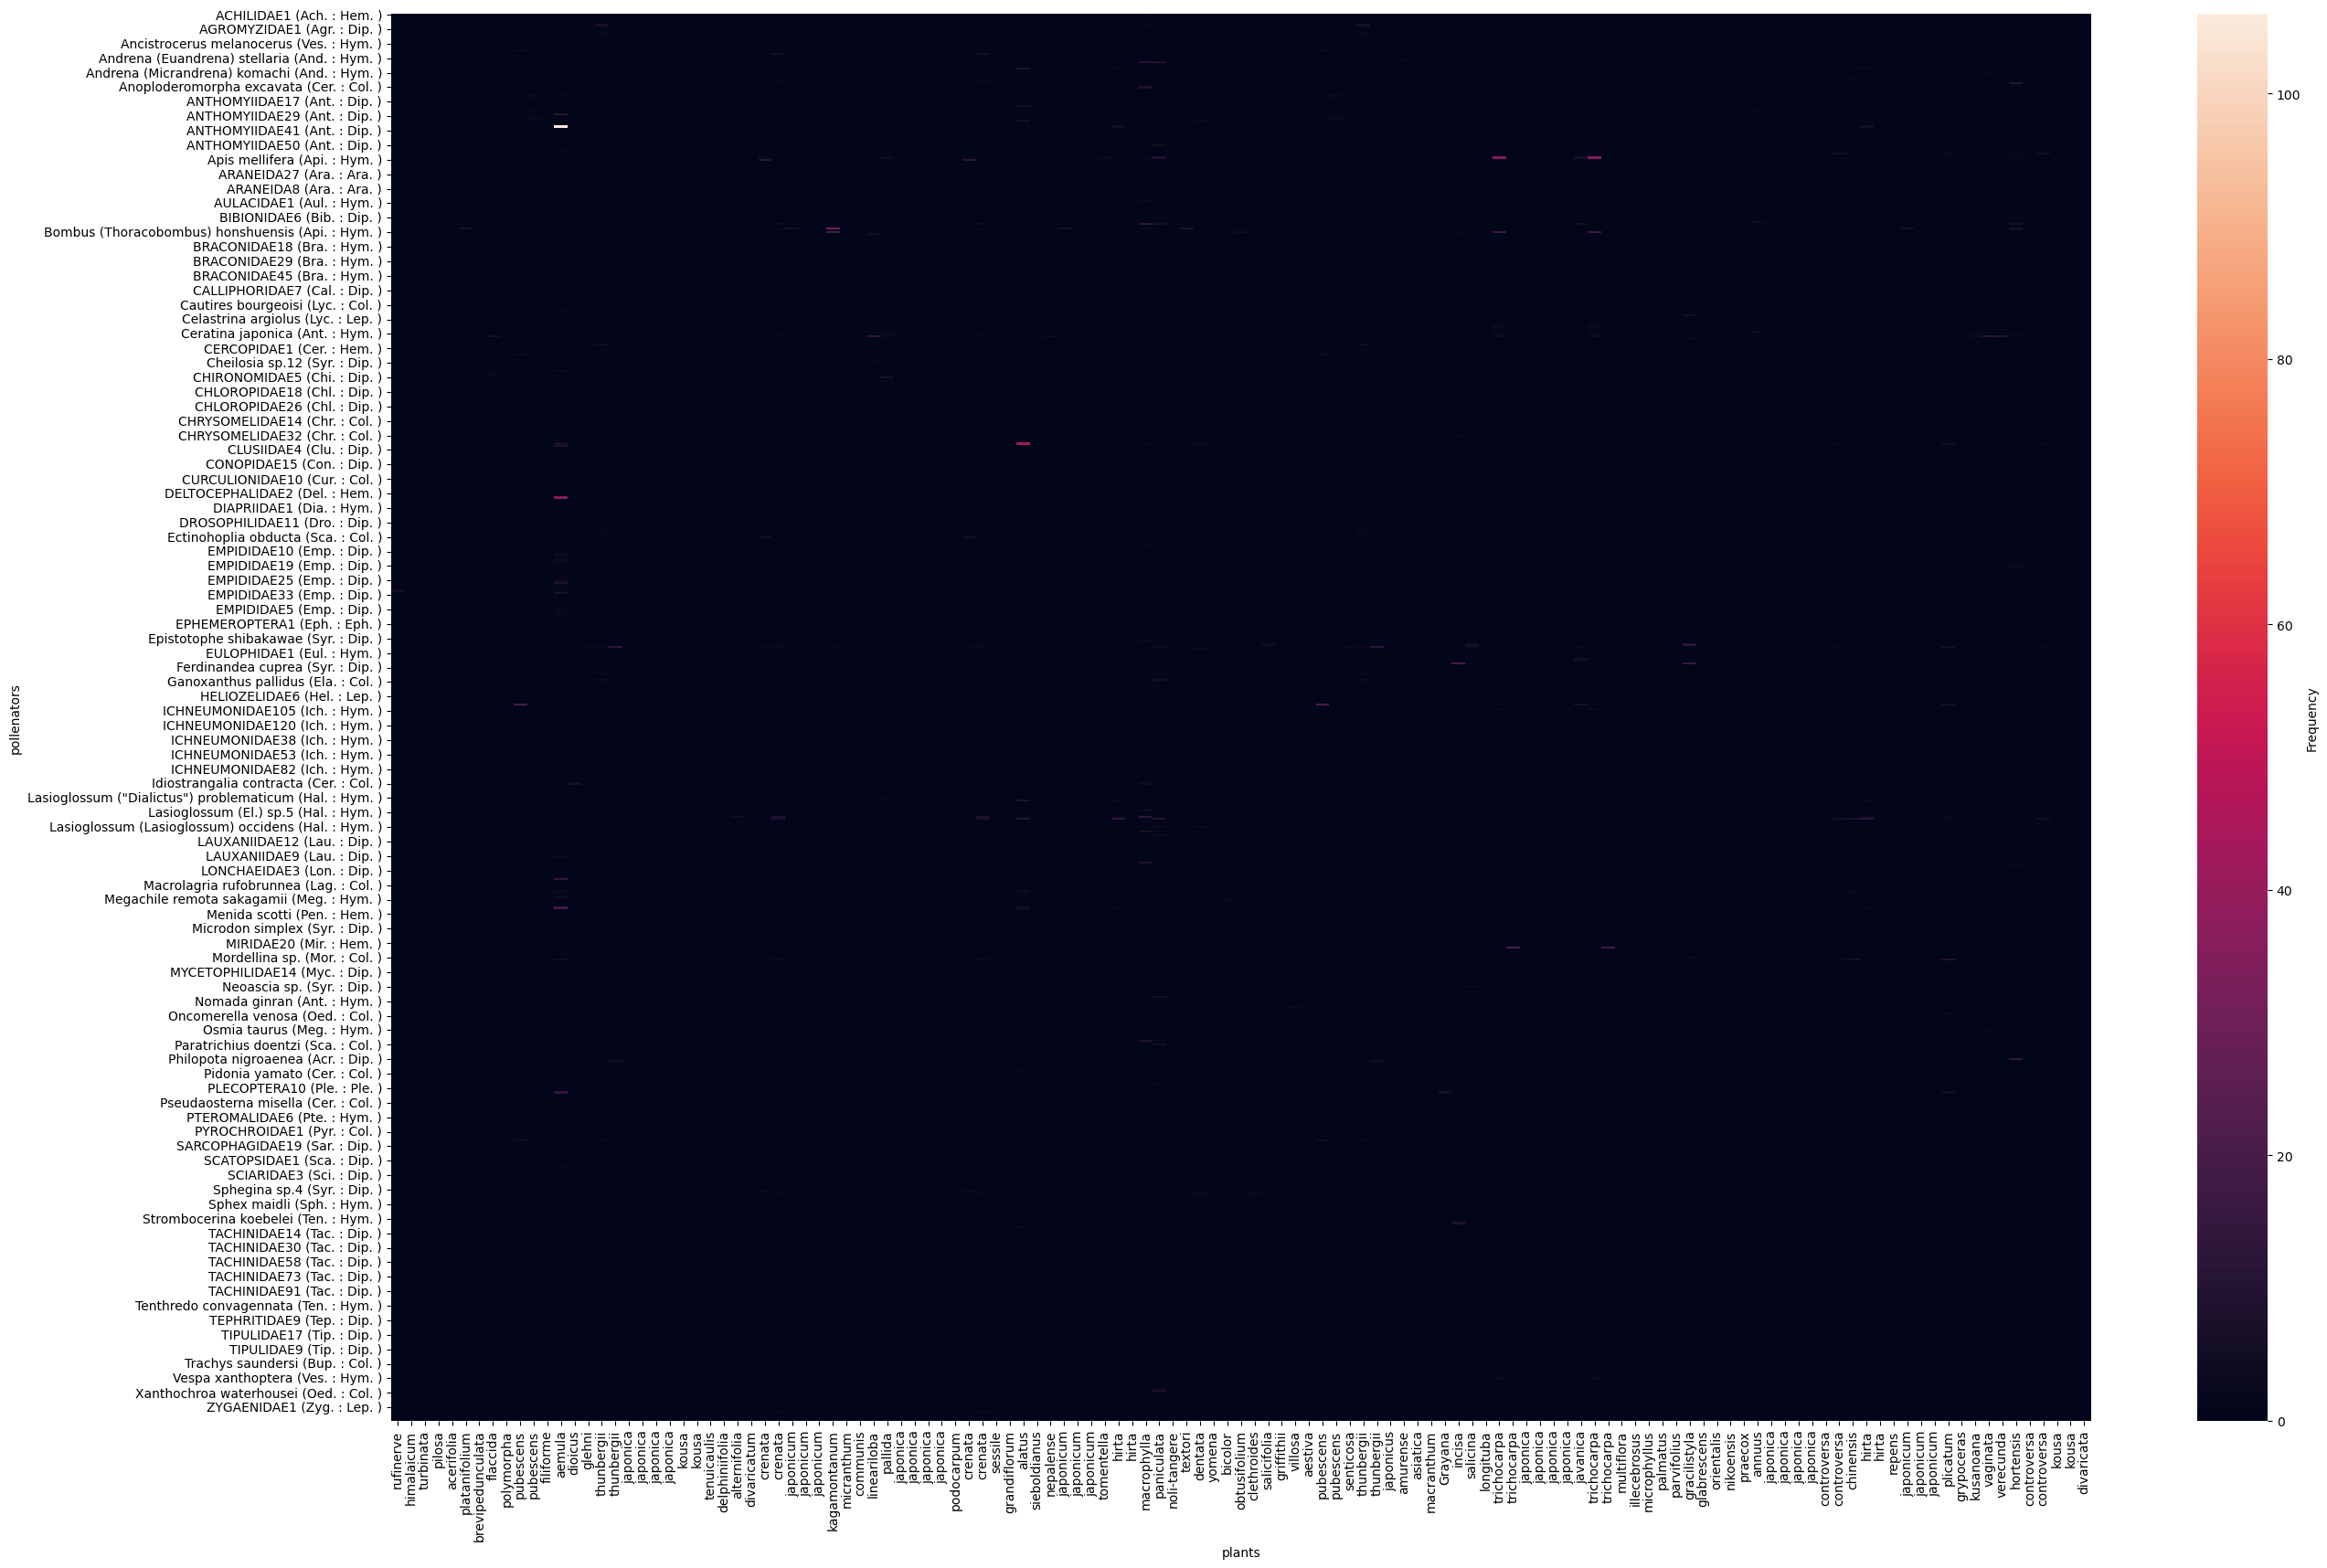

In [6]:

plt.figure(figsize = (30,20))
plt.xlabel('plant')
heatmap=sn.heatmap(df0[plant_species], 
                   cmap=sn.color_palette("rocket", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})

heatmap.set(xlabel='plants')              
plt.savefig('all_Data_heatmap',bbox_inches='tight')


In [7]:
location = df0[df0 <50].stack()
location.unique()




array([ 0.,  1.,  6.,  2.,  3.,  5., 11.,  9.,  8.,  4., 12., 34., 13.,
        7., 29., 19., 17., 43., 36., 15., 20., 10., 14.])

In [8]:
# I have created a function in order to deal with thresholds:



def _df0(thr):
    location = df0[df0 < thr].stack()
    dfdrop = df0.copy(deep=True)
    for i in range(len(location.index)):
        dfdrop.loc[location.index[i]] = 0
    



    return dfdrop



In [9]:
_df0(3)


rufinerve  himalaicum  \
pollenators                                                           
ACHILIDAE1 (Ach. : Hem. )                             0           0   
Acteniceromorphus nipponensis (Ela. : Col. )          0           0   
Actina jezoensis (Str. : Dip. )                       0           0   
Adelphocoris triannulatus (Mir. : Hem. )              0           0   
AGALLIIDAE1 (Aga. : Hem. )                            0           0   
...                                                 ...         ...   
LUSIIDAE1 (Clu. : Dip. )                              0           0   
Lasioglossum (El.) aff (Hal. : Hym )                  0           0   
Camponotus sp. (For. : Hym. )                         0           0   
Andrena sp. (And. : Hym. )                            0           0   
Ceratina sp. (Ant. : Hym.)                            0           0   

                                              turbinata  pilosa  acerifolia  \
pollenators                                                                   
ACHILIDAE1 (Ach. : Hem. )                             0       0           0   
Acteniceromorphus nipponensis (Ela. : Col. )          0       0           0   
Actina jezoensis (Str. : Dip. )                       0       0           0   
Adelphocoris triannulatus (Mir. : Hem. )              0       0           0   
AGALLIIDAE1 (Aga. : Hem. )                            0       0           0   
...                                                 ...     ...         ...   
LUSIIDAE1 (Clu. : Dip. )                              0       0           0   
Lasioglossum (El.) aff (Hal. : Hym )                  0       0           0   
Camponotus sp. (For. : Hym. )                         0       0           0   
Andrena sp. (And. : Hym. )                            0       0           0   
Ceratina sp. (Ant. : Hym.)                            0       0           0   

                                              platanifolium  brevipedunculata  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                                 0                 0   
Acteniceromorphus nipponensis (Ela. : Col. )              0                 0   
Actina jezoensis (Str. : Dip. )                           0                 0   
Adelphocoris triannulatus (Mir. : Hem. )                  0                 0   
AGALLIIDAE1 (Aga. : Hem. )                                0                 0   
...                                                     ...               ...   
LUSIIDAE1 (Clu. : Dip. )                                  0                 0   
Lasioglossum (El.) aff (Hal. : Hym )                      0                 0   
Camponotus sp. (For. : Hym. )                             0                 0   
Andrena sp. (And. : Hym. )                                0                 0   
Ceratina sp. (Ant. : Hym.)                                0                 0   

                                              flaccida  polymorpha  pubescens  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                            0           0          0   
Acteniceromorphus nipponensis (Ela. : Col. )         0           0          0   
Actina jezoensis (Str. : Dip. )                      0           0          0   
Adelphocoris triannulatus (Mir. : Hem. )             0           0          0   
AGALLIIDAE1 (Aga. : Hem. )                           0           0          0   
...                                                ...         ...        ...   
LUSIIDAE1 (Clu. : Dip. )                             0           0          0   
Lasioglossum (El.) aff (Hal. : Hym )                 0           0          0   
Camponotus sp. (For. : Hym. )                        0           0          0   
Andrena sp. (And. : Hym. )                           0           0          0   
Ceratina sp. (Ant. : Hym.)                           0           0  

In [10]:
#checking the function to see if we have values less than the threshold again ! 
l = _df0(3)[_df0(3) < 3].stack()
l.unique()

array([0.])

Index(['rufinerve', 'himalaicum', 'turbinata', 'pilosa', 'acerifolia',
       'platanifolium', 'brevipedunculata', 'flaccida', 'polymorpha',
       'pubescens', 'filiforme', 'aemula', 'dioicus', 'glehni', 'thunbergii',
       'japonica', 'kousa', 'tenuicaulis', 'delphiniifolia', 'alternifolia',
       'divaricatum', 'crenata', 'japonicum', 'kagamontanum', 'micranthum',
       'communis', 'lineariloba', 'pallida', 'japonica', 'podocarpum',
       'crenata', 'sessile', 'grandiflorum', 'alatus', 'sieboldianus',
       'nepalense', 'japonicum', 'tomentella', 'hirta', 'macrophylla',
       'paniculata', 'noli-tangere', 'textori', 'dentata', 'yomena', 'bicolor',
       'obtusifolium', 'clethroides', 'salicifolia', 'griffithii', 'villosa',
       'aestiva', 'pubescens', 'senticosa', 'thunbergii', 'japonicus',
       'amurense', 'asiatica', 'macranthum', 'Grayana', 'incisa', 'salicina',
       'longituba', 'trichocarpa', 'japonica', 'javanica', 'trichocarpa',
       'multiflora', 'illecebrosus

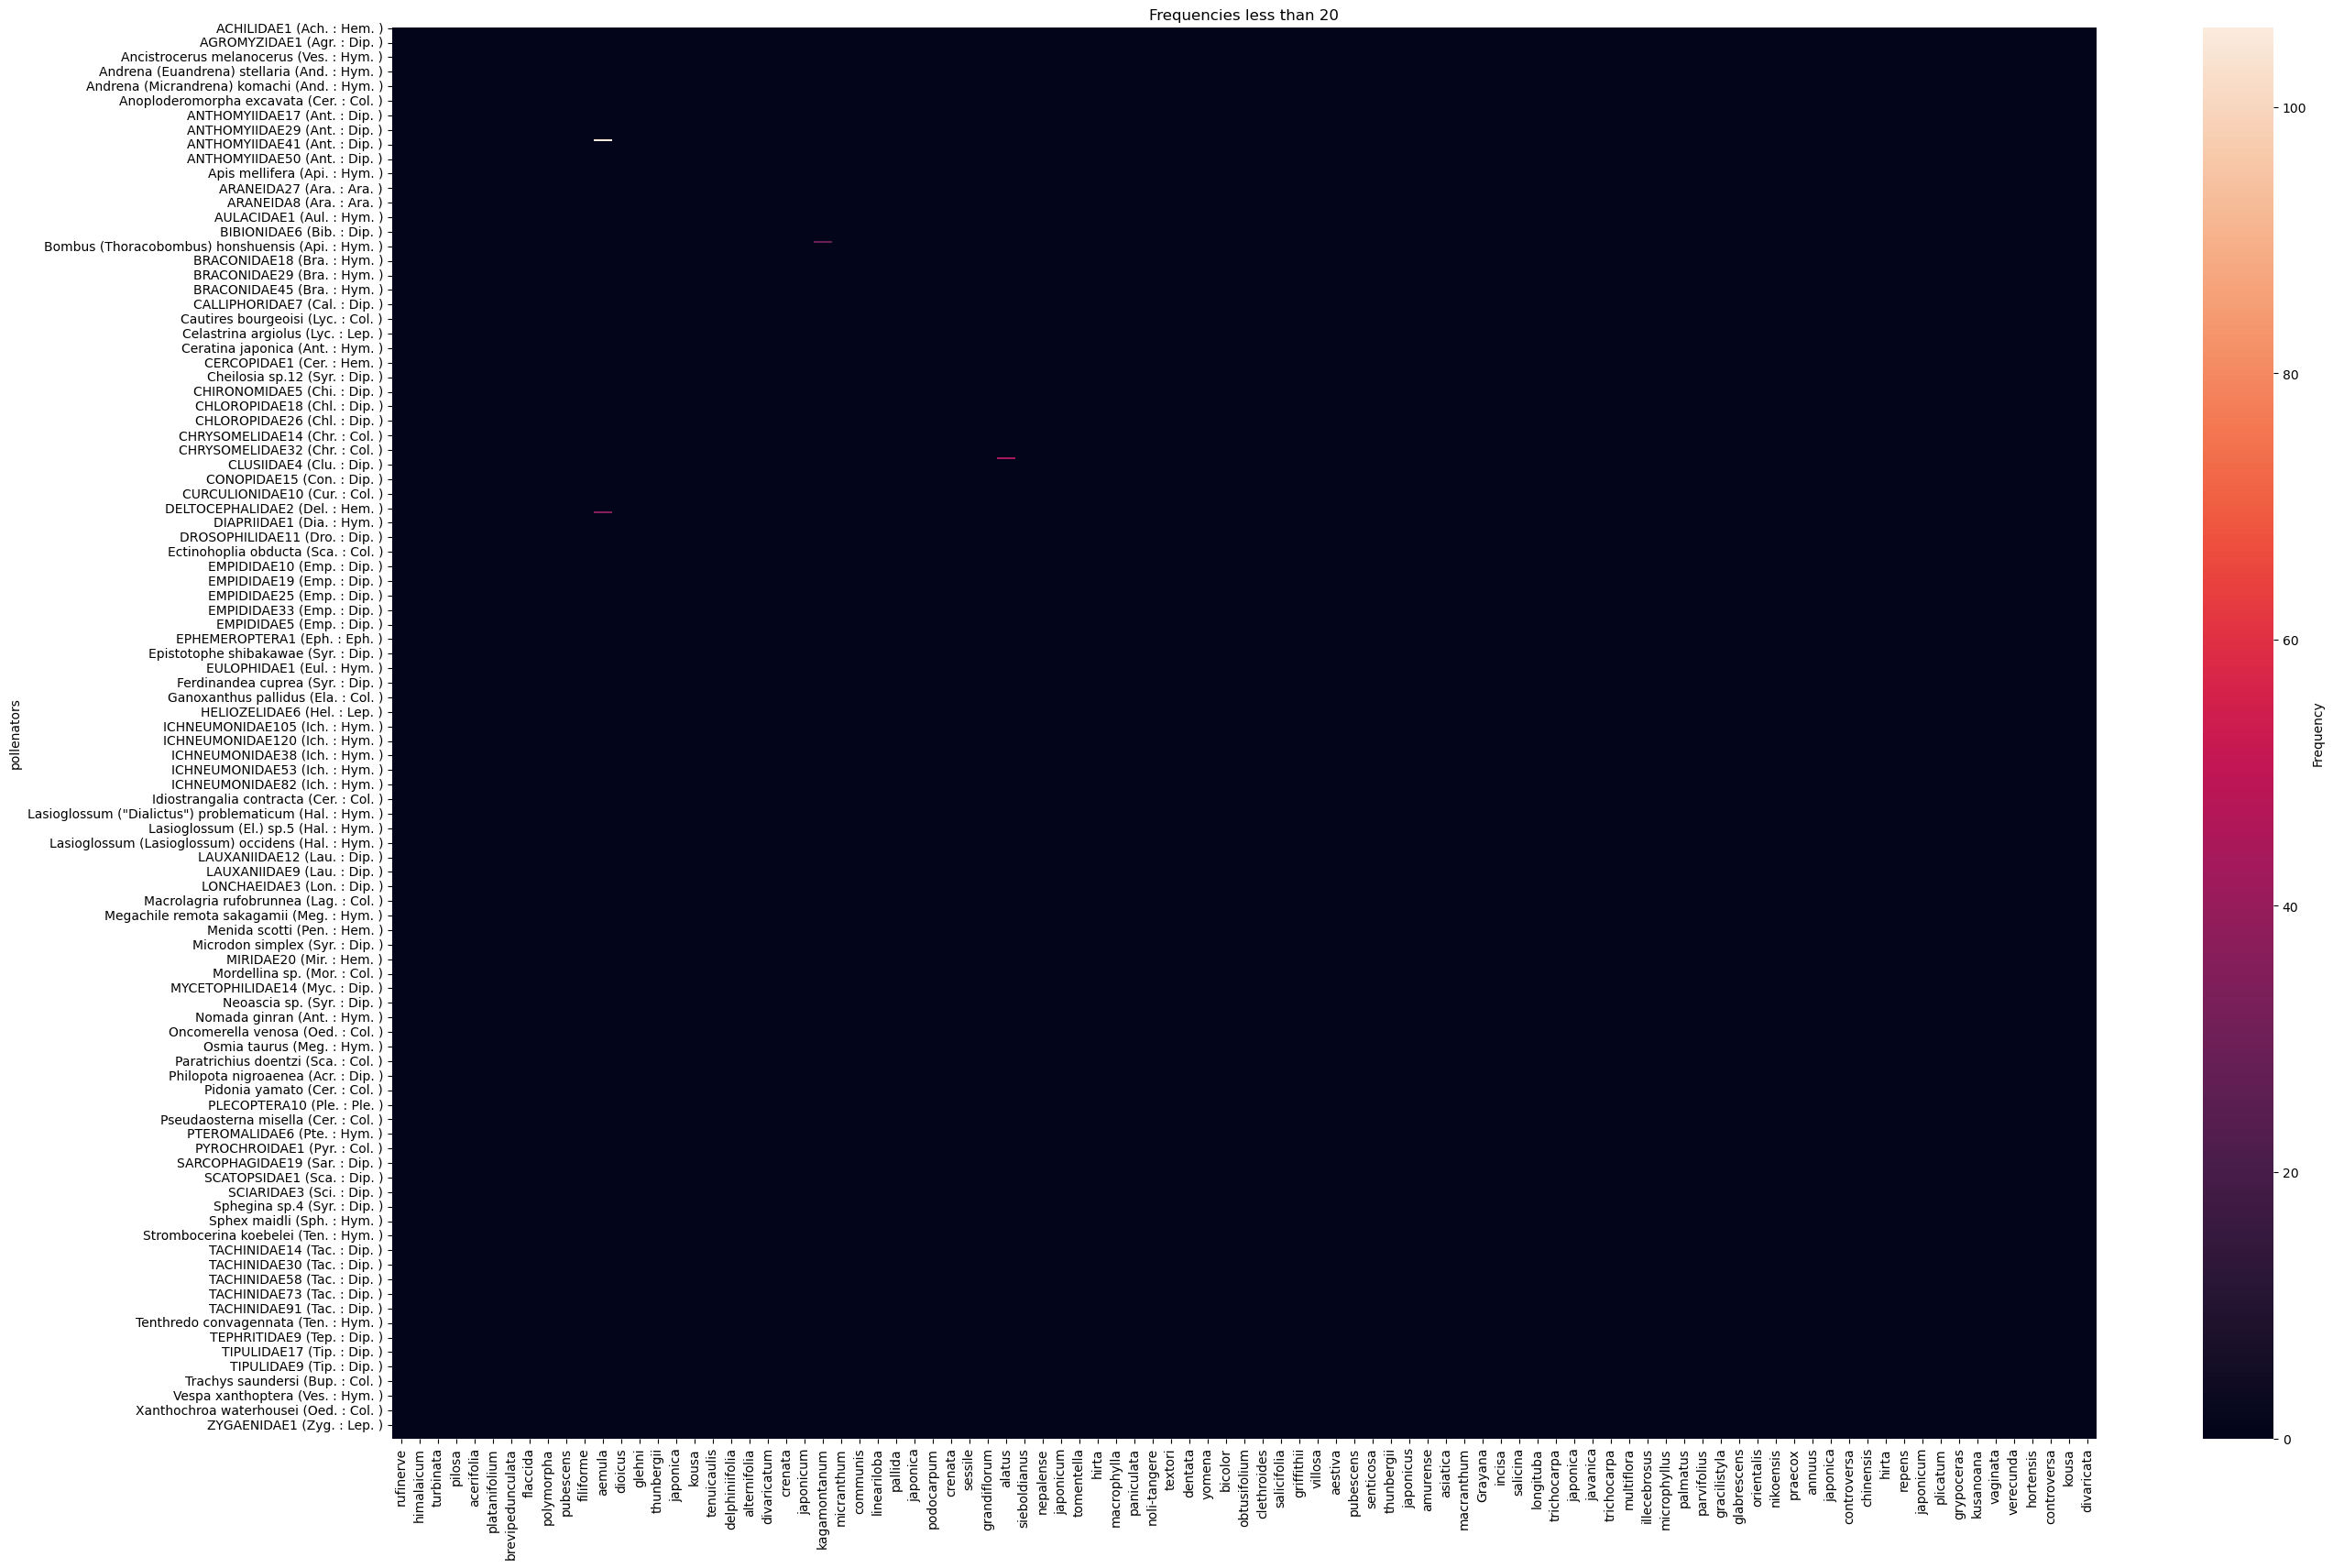

In [11]:

plt.figure(figsize = (30,20))

eatmap=sn.heatmap(_df0(20), 
                   cmap=sn.color_palette("rocket", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})


heatmap.set(xlabel='plants')              
plt.savefig('all_Data_heatmap',bbox_inches='tight')
plt.title('Frequencies less than 20')

print(_df0(20).columns)

Index(['rufinerve', 'himalaicum', 'turbinata', 'pilosa', 'acerifolia',
       'platanifolium', 'brevipedunculata', 'flaccida', 'polymorpha',
       'pubescens', 'filiforme', 'aemula', 'dioicus', 'glehni', 'thunbergii',
       'japonica', 'kousa', 'tenuicaulis', 'delphiniifolia', 'alternifolia',
       'divaricatum', 'crenata', 'japonicum', 'kagamontanum', 'micranthum',
       'communis', 'lineariloba', 'pallida', 'japonica', 'podocarpum',
       'crenata', 'sessile', 'grandiflorum', 'alatus', 'sieboldianus',
       'nepalense', 'japonicum', 'tomentella', 'hirta', 'macrophylla',
       'paniculata', 'noli-tangere', 'textori', 'dentata', 'yomena', 'bicolor',
       'obtusifolium', 'clethroides', 'salicifolia', 'griffithii', 'villosa',
       'aestiva', 'pubescens', 'senticosa', 'thunbergii', 'japonicus',
       'amurense', 'asiatica', 'macranthum', 'Grayana', 'incisa', 'salicina',
       'longituba', 'trichocarpa', 'japonica', 'javanica', 'trichocarpa',
       'multiflora', 'illecebrosus

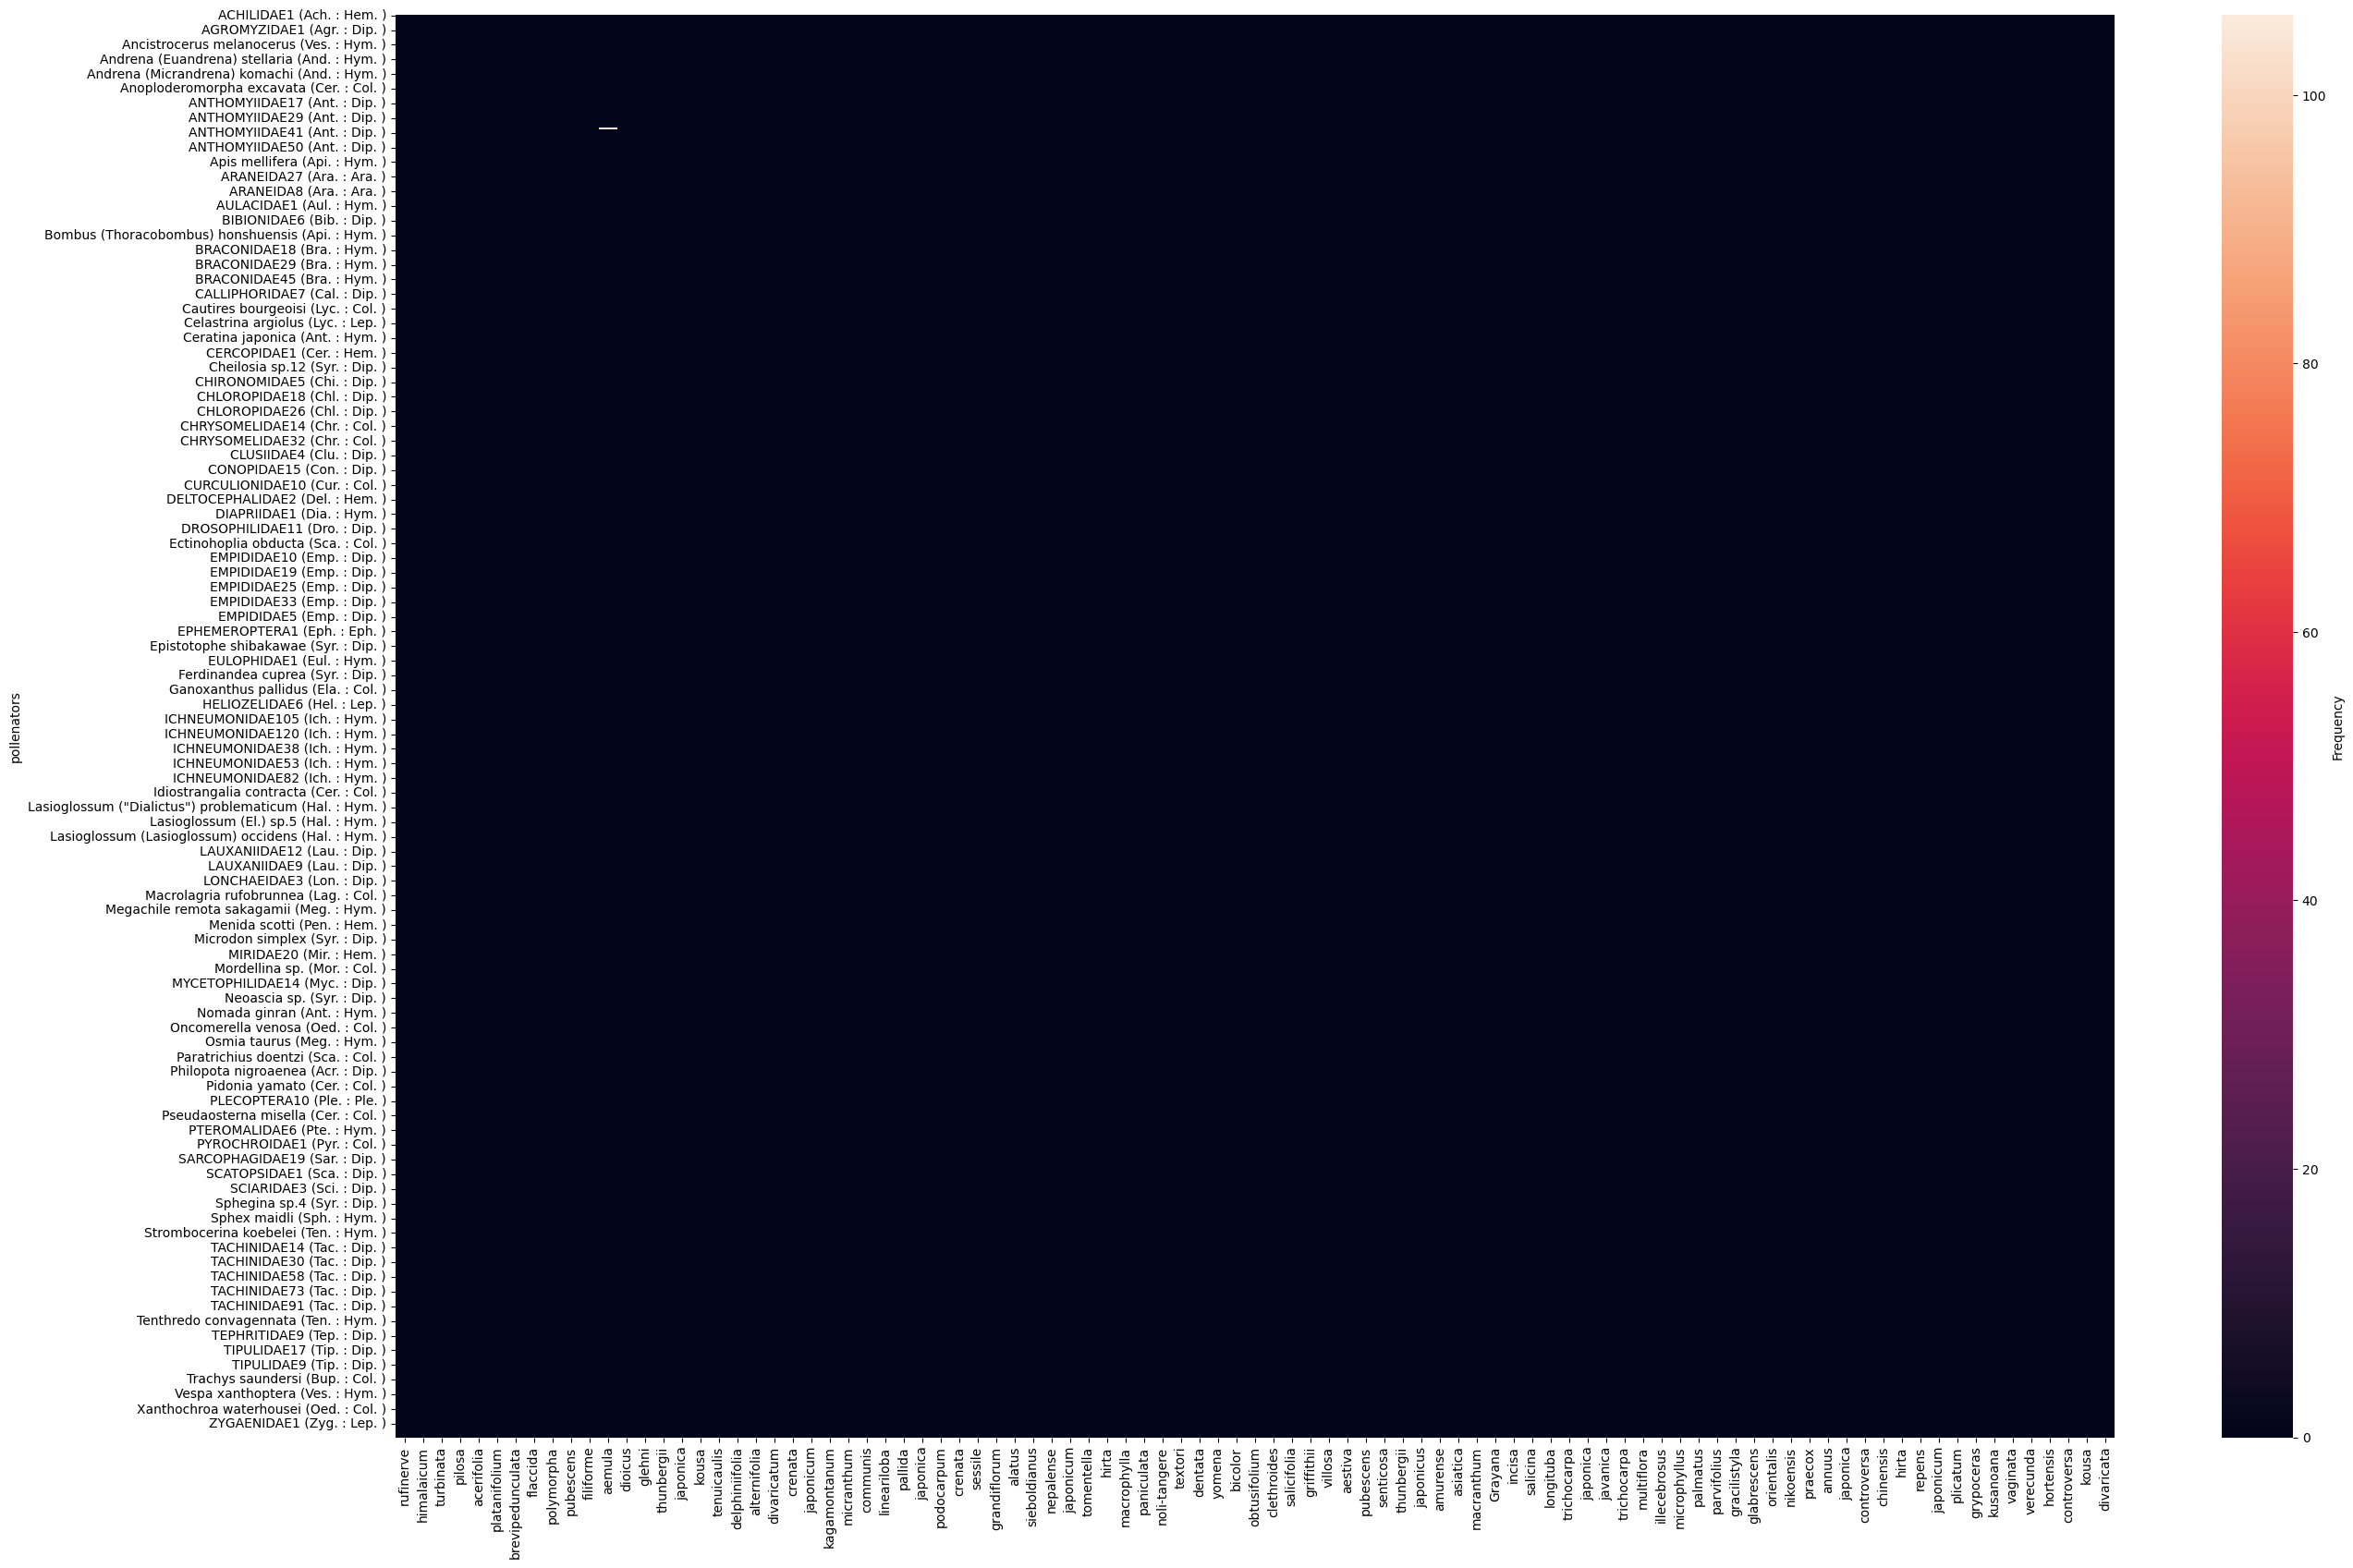

In [12]:
plt.figure(figsize = (30,20))

eatmap=sn.heatmap(_df0(100), 
                   cmap=sn.color_palette("rocket", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})


heatmap.set(xlabel='plants')              
plt.savefig('all_Data_heatmap',bbox_inches='tight')

print(_df0(20).columns)

# Creating bipartite network:

here we create df2 is a matrix only with indeces, without any names, and df1_use works like a bridge between indeces +1000 and the pollinators names.

In [13]:
df1 = dataframe.copy(deep=True)
df1_use = dataframe.copy(deep=True)

In [14]:
df1

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [15]:
df1 = df1.droplevel(level = [0, 1], axis = 1)
df1_use = df1_use.droplevel(level = [0, 1], axis = 1) # this dataframe bridges between the indeces and the name of pollinators. we use this in bipartite function.
df1


pol_ge_sp  no.  1  2  3  4  5  6  7  \
0                       ACHILIDAE1 (Ach. : Hem. )   53  0  0  0  0  0  0  0   
1    Acteniceromorphus nipponensis (Ela. : Col. )  398  0  0  0  0  0  0  0   
2                 Actina jezoensis (Str. : Dip. )  139  0  0  0  0  0  0  0   
3        Adelphocoris triannulatus (Mir. : Hem. )   28  0  0  0  0  0  0  0   
4                      AGALLIIDAE1 (Aga. : Hem. )   47  0  0  0  0  0  0  0   
..                                            ...  ... .. .. .. .. .. .. ..   
674                      LUSIIDAE1 (Clu. : Dip. )  675  0  0  0  0  0  0  0   
675          Lasioglossum (El.) aff (Hal. : Hym )  676  0  0  0  0  0  0  0   
676                 Camponotus sp. (For. : Hym. )  677  0  0  0  0  0  0  0   
677                    Andrena sp. (And. : Hym. )  678  0  0  0  0  0  0  0   
678                    Ceratina sp. (Ant. : Hym.)  679  0  0  0  0  0  0  0   

     8  ...  84  85  86  87  88  89  90  91  92  93  
0    0  ...   0   0   0   0   0   0   0   0   0   0  
1    0  ...   0   0   0   0   0   0   0   0   0   0  
2    0  ...   0   0   0   0   0   0   0   0   0   0  
3    0  ...   0   0   0   0   0   0   0   0   0   0  
4    0  ...   0   0   0   0   0   0   0   0   0   0  
..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
674  0  ...   0   0   0   0   0   0   0   0   0   0  
675  0  ...   0   0   0   0   0   0   0   0   0   0  
676  0  ...   0   0   0   0   0   0   0   0   0   0  
677  0  ...   0   0   0   0   0   0   0   0   0   0  
678  0  ...   0   0   0   0   0   0   0   0   0   0  

[679 rows x 95 columns]

In [16]:
df1_use.index = df1_use.index + 1000

In [17]:
df1_use

pol_ge_sp  no.  1  2  3  4  5  6  7  \
1000                     ACHILIDAE1 (Ach. : Hem. )   53  0  0  0  0  0  0  0   
1001  Acteniceromorphus nipponensis (Ela. : Col. )  398  0  0  0  0  0  0  0   
1002               Actina jezoensis (Str. : Dip. )  139  0  0  0  0  0  0  0   
1003      Adelphocoris triannulatus (Mir. : Hem. )   28  0  0  0  0  0  0  0   
1004                    AGALLIIDAE1 (Aga. : Hem. )   47  0  0  0  0  0  0  0   
...                                            ...  ... .. .. .. .. .. .. ..   
1674                      LUSIIDAE1 (Clu. : Dip. )  675  0  0  0  0  0  0  0   
1675          Lasioglossum (El.) aff (Hal. : Hym )  676  0  0  0  0  0  0  0   
1676                 Camponotus sp. (For. : Hym. )  677  0  0  0  0  0  0  0   
1677                    Andrena sp. (And. : Hym. )  678  0  0  0  0  0  0  0   
1678                    Ceratina sp. (Ant. : Hym.)  679  0  0  0  0  0  0  0   

      8  ...  84  85  86  87  88  89  90  91  92  93  
1000  0  ...   0   0   0   0   0   0   0   0   0   0  
1001  0  ...   0   0   0   0   0   0   0   0   0   0  
1002  0  ...   0   0   0   0   0   0   0   0   0   0  
1003  0  ...   0   0   0   0   0   0   0   0   0   0  
1004  0  ...   0   0   0   0   0   0   0   0   0   0  
...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1674  0  ...   0   0   0   0   0   0   0   0   0   0  
1675  0  ...   0   0   0   0   0   0   0   0   0   0  
1676  0  ...   0   0   0   0   0   0   0   0   0   0  
1677  0  ...   0   0   0   0   0   0   0   0   0   0  
1678  0  ...   0   0   0   0   0   0   0   0   0   0  

[679 rows x 95 columns]

In [18]:
df1 = df1.drop(columns = ['no.', 'pol_ge_sp'])
df1.head(40)

1   2   3   4   5   6   7   8   9   10  ...  84  85  86  87  88  89  90  \
0    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
13   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
14   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
15   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
16   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
17   0   0   0   0   0   0   0   0   0   3  ...   0   0   0   0   0   0   0   
18   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
19   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
20   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
21   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   1   0   0   
22   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
23   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
24   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
25   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
26   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
27   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
28   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   2   0   0   
29   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
30   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
31   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
32   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
33   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0  11   
34   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   
35   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
36   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
37   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
38   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
39   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   

    91  92  93  
0    0   0   0  
1    0   0   0  
2    0   0   0  
3    0   0   0  
4    0   0   0  
5    0   0   0  
6    0   0   0  
7    0   0   0  
8    0   0   0  
9    0   0   0  
10   0   0   0  
11   0   0   0  
12   0   0   0  
13   0   0   0  
14   0   0   0  
15   0   0   0  
16   0   0   0  
17   0   0   0  
18   0   0   0  
19   0   0   0  
20   0   0   0  
21   0   0   0  
22   0   0   0  
23   0   0   0  
24   0   0   0  
25   0   0   0  
26   0   0   0  
27   0   0   0  
28   0   0   0  
29   0   0   0  
30   0   0   0  
31   1   0   0  
32   0   0   0  
33   0   0   0  
34   0   0   0  
35   0   0   0  
36   0   0   0  
37   0   0   0  
38   0   0   0  
39   0   0   0  

[40 rows x 93 columns]

In [19]:
df2 = df1.copy(deep=True)

In [20]:
df2.index = df2.index + 1000

In [21]:
df2.head(14)

1   2   3   4   5   6   7   8   9   10  ...  84  85  86  87  88  89  90  \
1000   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1001   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1002   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1003   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1004   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1005   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1006   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1007   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1008   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1009   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1010   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1011   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1012   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
1013   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   

      91  92  93  
1000   0   0   0  
1001   0   0   0  
1002   0   0   0  
1003   0   0   0  
1004   0   0   0  
1005   0   0   0  
1006   0   0   0  
1007   0   0   0  
1008   0   0   0  
1009   0   0   0  
1010   0   0   0  
1011   0   0   0  
1012   0   0   0  
1013   0   0   0  

[14 rows x 93 columns]

In [22]:
df2.to_csv('/Users/melikakeshavarz/Desktop/INFO/matrix.csv')

In [23]:
# the difference between _df2() and _df0() function is _df2 looks like a matrix and its indeces are just numbers.


def _df2(thr):
    location = df2[df2 < thr].stack()
    dfdrop = df2.copy(deep=True)
    for i in range(len(location.index)):
        dfdrop.loc[location.index[i]] = 0

    
    return dfdrop

In [48]:
# this is only a test to check the thresholds for the bipartite function.
_df2_thr = _df2(20).copy(deep=True)

L = _df2_thr[_df2_thr != 0].stack()
Pol = sorted(list(set(L.index.get_level_values(0))))
plant = sorted(list(set(L.index.get_level_values(1))))
all_nodes = plant + Pol
L.unique()
all_nodes



[10, 12, 24, 34, 64, 67, 1054, 1069, 1103, 1207, 1233, 1333, 1450]

In [59]:
# a function to create bipartite network with different thresholds:



def bipartite(thr):
    source_id = []
    target_id = []
    _df2_thr = _df2(thr).copy(deep=True)


    # Prepare node list
    L = _df2_thr[_df2_thr != 0].stack()
    pol = sorted(list(set(L.index.get_level_values(0))))
    plant = sorted(list(set(L.index.get_level_values(1))))
    all_nodes = plant + pol
    start_pol = pol[0]

    


    # Write to net format
    output_file = '/Users/melikakeshavarz/Desktop/INFO/bi_freq_thr_{}.net'.format(thr)  
    with open(output_file, 'w') as f:

        f.write(f"# {len(plant)} main nodes and {len(pol)} feature nodes \n")
        
        f.write(f"*Vertices {len(all_nodes)}\n")
        
        
        for idx in all_nodes:
            
            if idx in pol:
                f.write(f"{idx} \"{df1_use.loc[idx, 'pol_ge_sp']}\"\n")
                target_id.append(idx)

            elif idx in plant:
                f.write(f"{idx} \"{plant_species[idx-1]}\"\n")
                source_id.append(idx)



        f.write(f"*Bipartite {start_pol}\n")
    
        for n in list(_df2_thr.index):
            for m in list(_df2_thr.columns):
                if _df2_thr.loc[n, m] == 0:
                    pass
                else:
                    f.write(f"{m} {n} {_df2_thr.loc[n, m]}\n")
    



In [60]:
jj_thr = [x for x in range(0, 16)]

for i in jj_thr:
    bipartite(i)



### This picture is for the network without threshold:

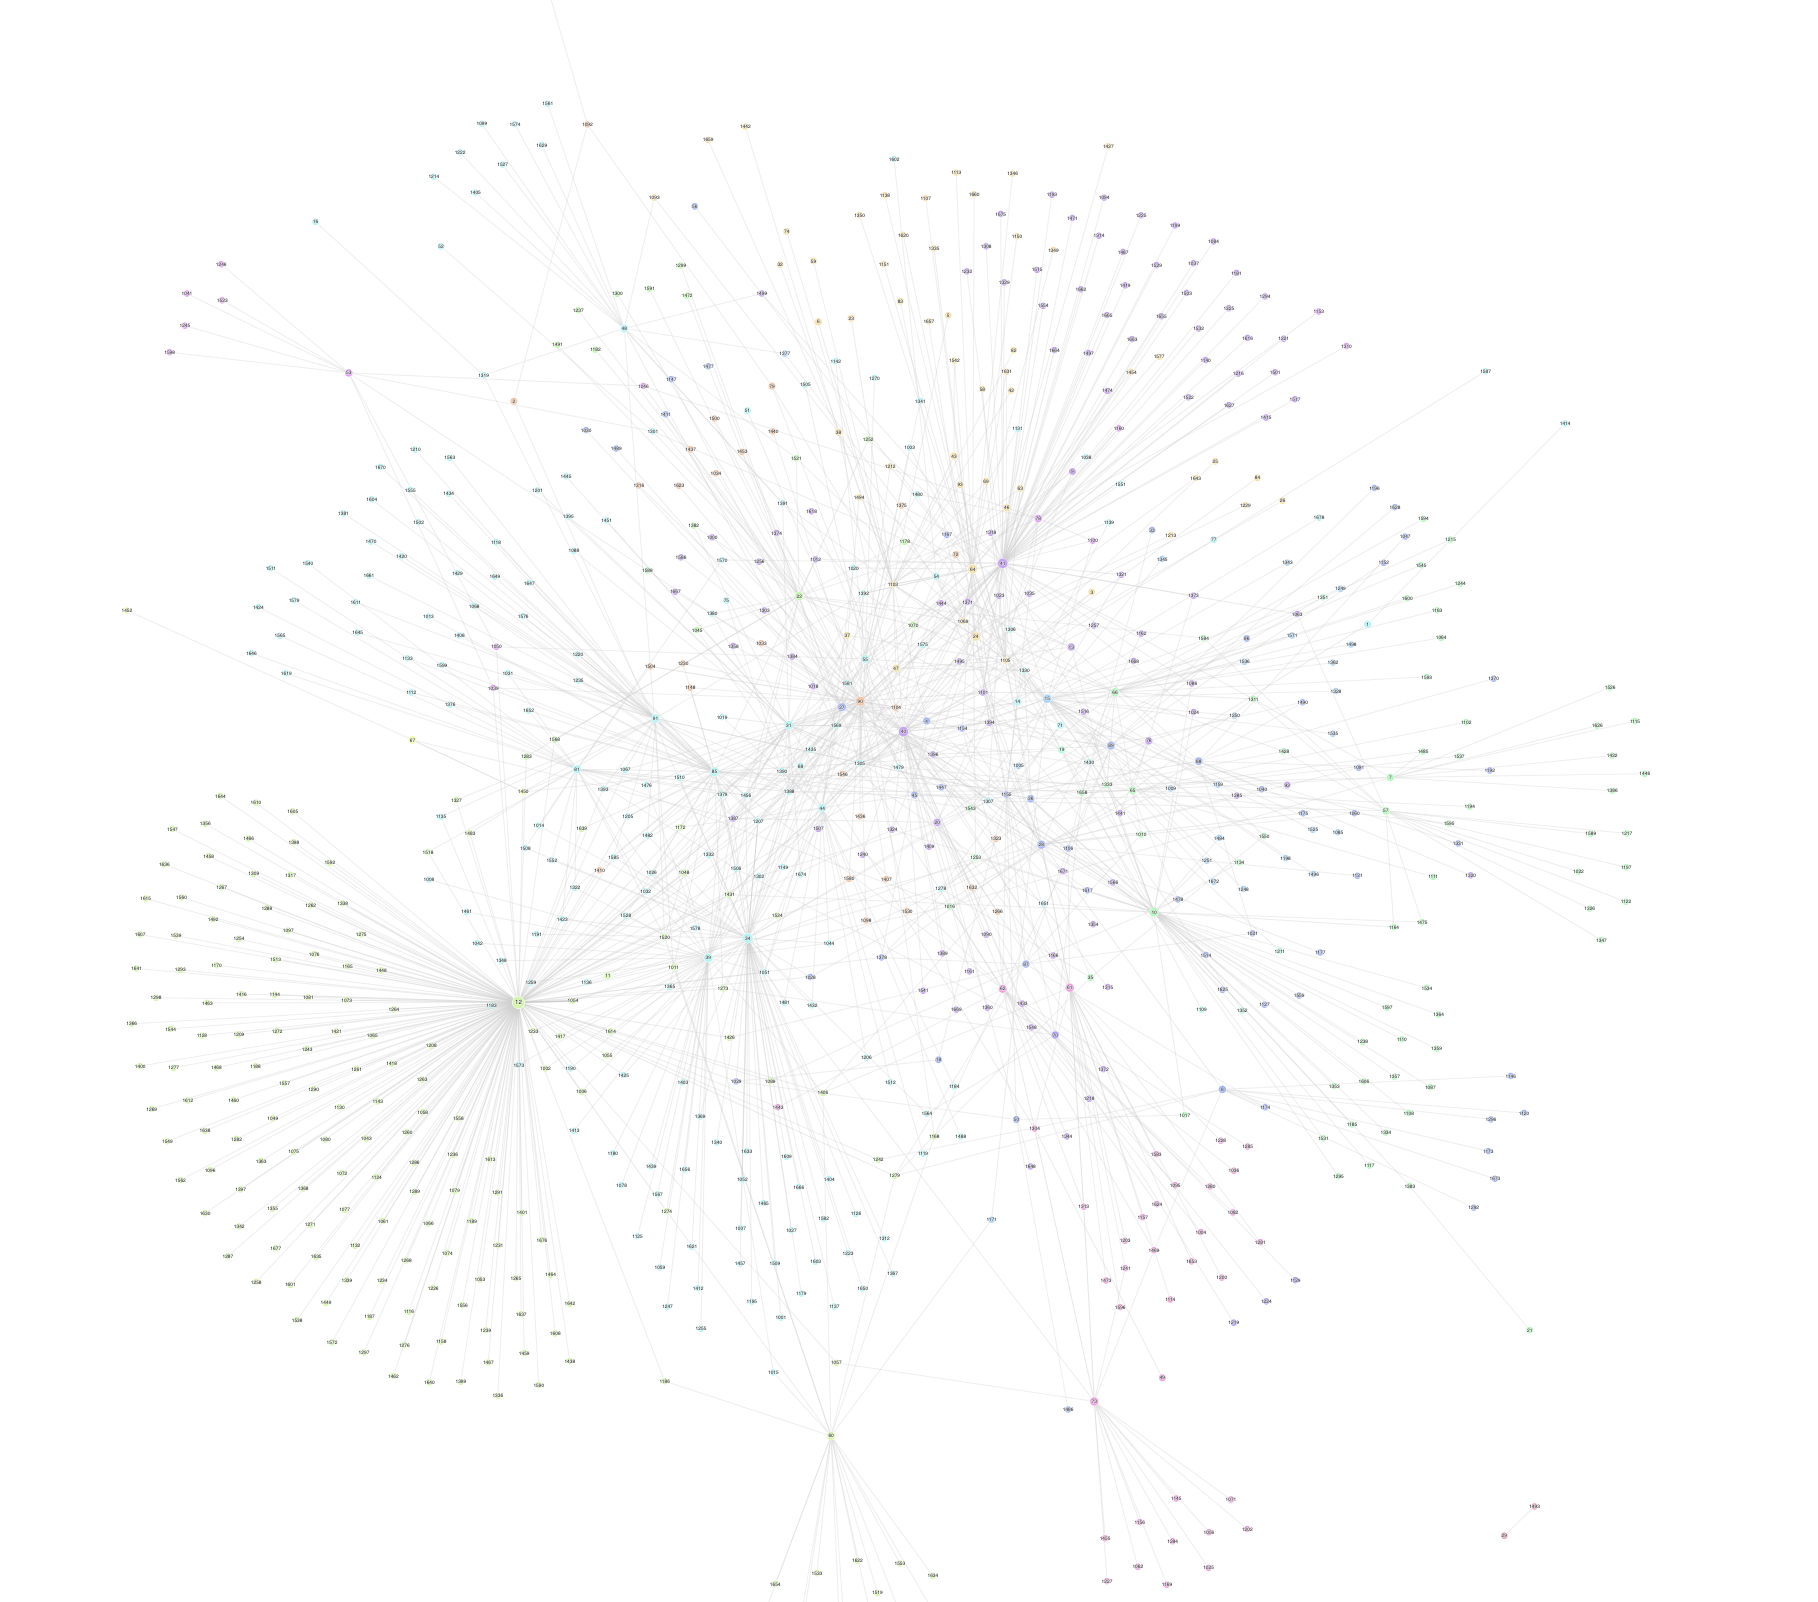

In [62]:
from IPython.display import Image
Image(filename="/Users/melikakeshavarz/Desktop/thr_1.png")

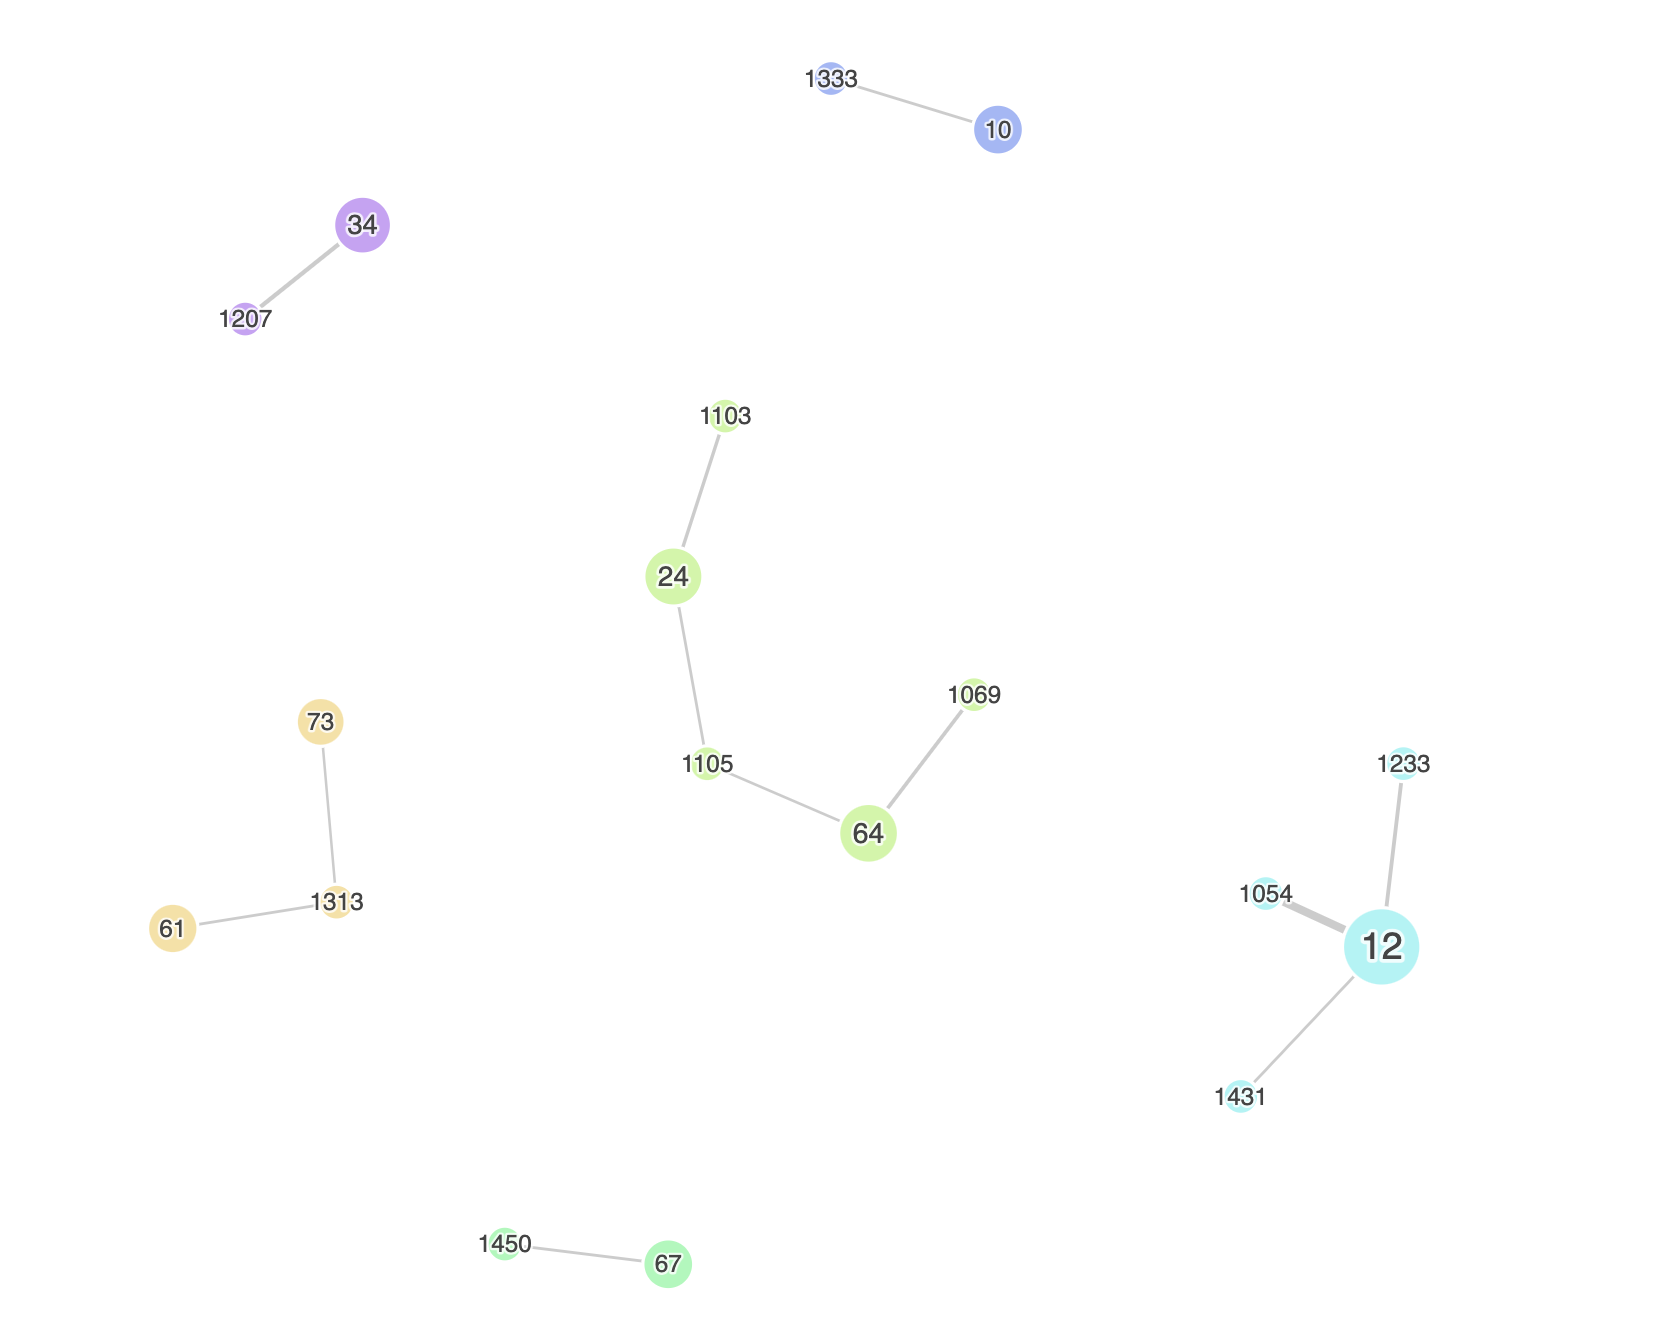

In [63]:
Image(filename="/Users/melikakeshavarz/Desktop/thr_15.png")


# Create unipartite with the bipartite :

by adding this flag `--skip-adjust-bipartite-flow`, we get a unipartite network from the bipartite network above (without threshold).

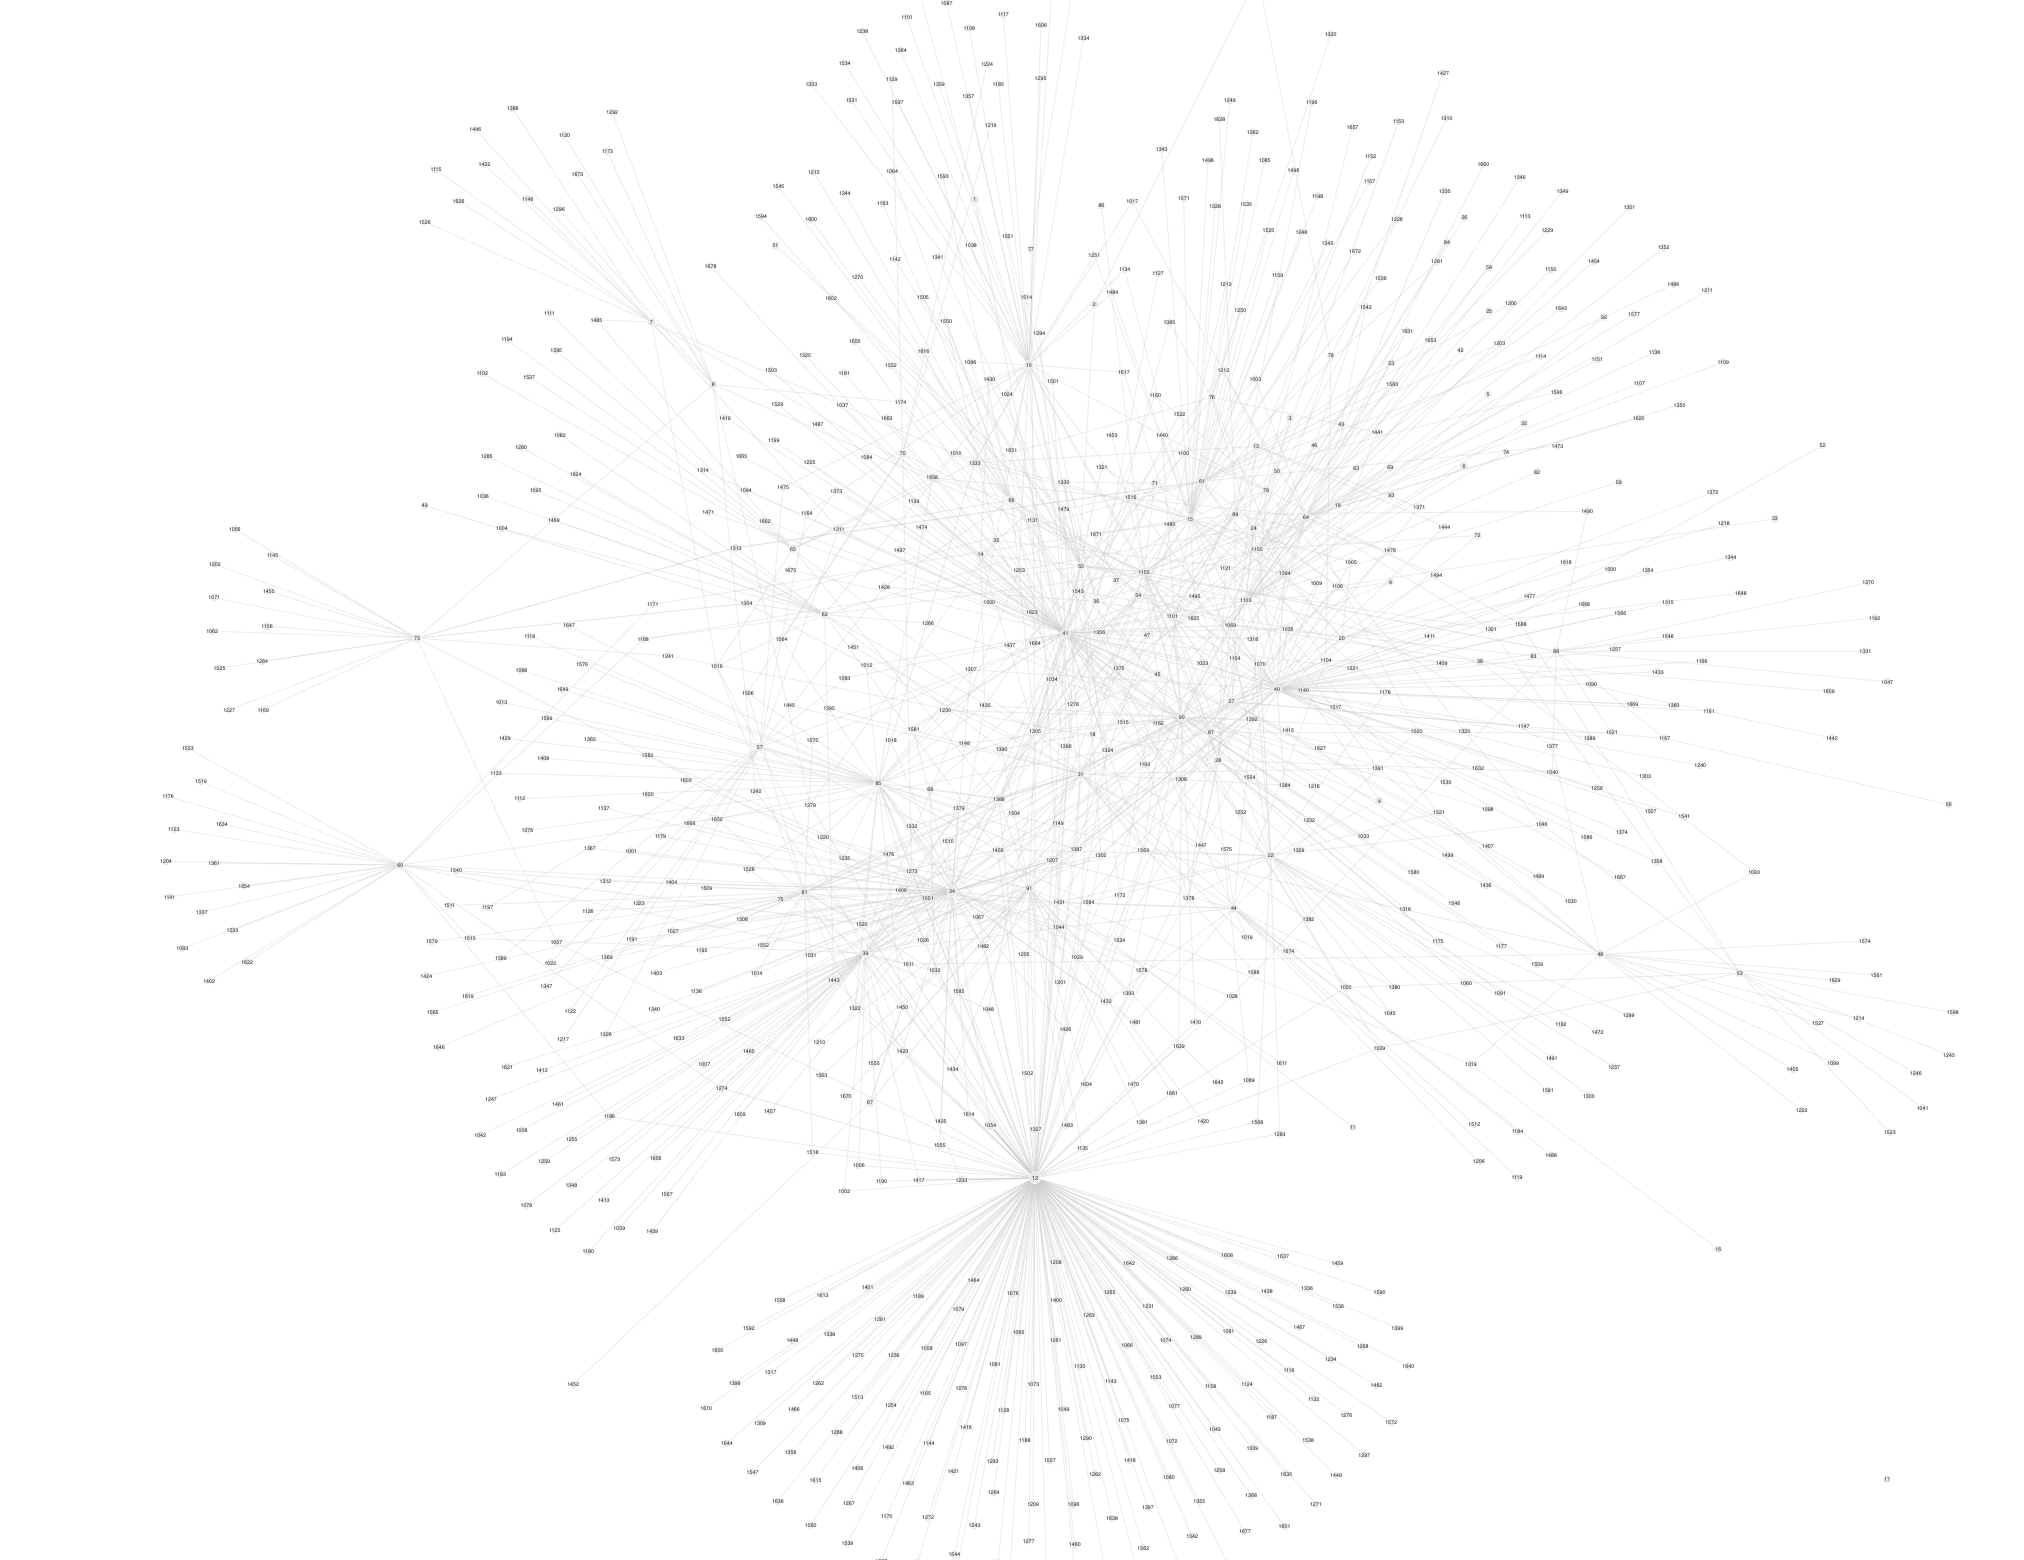

In [29]:
Image(filename="/Users/melikakeshavarz/Desktop/Unipartite.png")